# Topic Modeling

In [36]:
# ! pip install lda

In [37]:
import os, csv, nltk, lda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/kenne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kenne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kenne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# LDA

In [38]:
# clean df so that speech_id is associated with each speech
speech_info = pd.read_csv('data-files/speech_info.csv')

# get video id and create dictionary to link
speech_info['Video ID'] = speech_info['YouTube Speech Link'].str.extract(r'v=([a-zA-Z0-9_-]+)')
vidID_to_speechID = dict(zip(speech_info['Video ID'], speech_info['Speech ID'],))

# get video id for transcripts
clip_transcripts = pd.read_csv('data-files/transcripts_w_lies.csv')
clip_transcripts['Video ID'] = clip_transcripts['YouTube URL'].str.extract(r'youtu\.be/([a-zA-Z0-9_-]+)')
clip_transcripts['Video ID'] = clip_transcripts['Video ID'].fillna('XokApnr_Cak')

# replace video id with speech id and save to new column
clip_transcripts['Speech ID'] = clip_transcripts['Video ID'].replace(vidID_to_speechID).astype('int')

# add speaker to clips df to use later
clip_transcripts = pd.merge(clip_transcripts, speech_info[['Speech ID', 'Speaker']], how = 'left', on = 'Speech ID')

#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(clip_transcripts.isnull().sum().sum())
clip_transcripts=clip_transcripts.dropna()

speech_id = 'Speech ID' #input('provide the column name for id: ')
clip_transcript = 'Transcript' #input('provide the column name for text: ')
ntopics= 5 #input('Provide the number of latent topics: ');

word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=list(set(stopwords.words('english')))

def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(clip_transcripts[clip_transcript])

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic = model.doc_topic_
doc_topic_df = pd.DataFrame(doc_topic, index=clip_transcripts.index)
clip_transcripts = clip_transcripts.join(doc_topic_df)

# Display the joined DataFrame
display(clip_transcripts.head())
speech=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    speech[topic]=clip_transcripts.groupby([speech_id])[i].mean()

speech=speech.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names_out()
topics1=topics.transpose()
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("data-files/topic_word_dist.xlsx")
display(topics1)
speech.to_excel("data-files/speech_topic_dist.xlsx",index=False)
print ("Speech topic distribution written in file speech_topic_dist.xlsx ")
display(speech)

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_1166/2357156438.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clip_transcripts['Speech ID'] = clip_transcripts['Video ID'].replace(vidID_to_speechID).astype('int')
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(
INFO:lda:n_documents: 525
INFO:lda:vocab_size: 3490
INFO:lda:n_words: 15492
INFO:lda:n_to

Number of rows with any of the empty columns:
13
(525, 3490)


INFO:lda:<60> log likelihood: -126973
INFO:lda:<70> log likelihood: -126828
INFO:lda:<80> log likelihood: -126522
INFO:lda:<90> log likelihood: -126465
INFO:lda:<100> log likelihood: -126198
INFO:lda:<110> log likelihood: -126365
INFO:lda:<120> log likelihood: -126230
INFO:lda:<130> log likelihood: -125921
INFO:lda:<140> log likelihood: -126095
INFO:lda:<150> log likelihood: -125895
INFO:lda:<160> log likelihood: -125651
INFO:lda:<170> log likelihood: -125762
INFO:lda:<180> log likelihood: -125723
INFO:lda:<190> log likelihood: -125593
INFO:lda:<200> log likelihood: -125507
INFO:lda:<210> log likelihood: -125550
INFO:lda:<220> log likelihood: -125656
INFO:lda:<230> log likelihood: -125457
INFO:lda:<240> log likelihood: -125570
INFO:lda:<250> log likelihood: -125473
INFO:lda:<260> log likelihood: -125351
INFO:lda:<270> log likelihood: -125400
INFO:lda:<280> log likelihood: -125579
INFO:lda:<290> log likelihood: -125402
INFO:lda:<300> log likelihood: -125366
INFO:lda:<310> log likelihood

,YouTube URL,Chunk Number,Chunk Filename,Transcript,lie,Video ID,Speech ID,Speaker,0,1,2,3,4
1,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,2,/Users/milanvaghani/Desktop/Unstructed Machine...,good evening everyone. Good evening good even...,False,-ofJu78Wpn0,1,Kamala Harris,0.009524,0.009524,0.390476,0.580952,0.009524
2,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,3,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you thank you thank you thank you thank...,False,-ofJu78Wpn0,1,Kamala Harris,0.129412,0.011765,0.835294,0.011765,0.011765
3,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,4,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you all thank you all okay we got to g...,False,-ofJu78Wpn0,1,Kamala Harris,0.004651,0.004651,0.981395,0.004651,0.004651
4,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,5,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you everyone thank you everyone thank yo...,False,-ofJu78Wpn0,1,Kamala Harris,0.003636,0.221818,0.730909,0.003636,0.040000
5,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,6,/Users/milanvaghani/Desktop/Unstructed Machine...,I love you so very much do our President Joe ...,False,-ofJu78Wpn0,1,Kamala Harris,0.053659,0.443902,0.004878,0.492683,0.004878


Topics word distribution written in file topic_word_dist.xlsx 


,0,1,2,3,4
00,0.000004,0.000003,0.000003,0.000004,0.000362
000,0.000004,0.000003,0.000003,0.000004,0.007167
1,0.000004,0.000003,0.000003,0.002006,0.000004
10,0.000004,0.003019,0.000003,0.000004,0.000004
100,0.000004,0.000003,0.000003,0.000004,0.002511
...,...,...,...,...,...
york,0.000004,0.000003,0.000003,0.000405,0.000004
yorktown,0.000004,0.000003,0.000270,0.000004,0.000004
young,0.000004,0.000003,0.000003,0.005210,0.000004
z,0.000004,0.000003,0.000538,0.000004,0.000004


Speech topic distribution written in file speech_topic_dist.xlsx 


,Speech ID,topic_0,topic_1,topic_2,topic_3,topic_4
0,1,0.315956,0.135062,0.111296,0.225879,0.211806
1,2,0.083088,0.328978,0.226839,0.185979,0.175116
2,3,0.097230,0.237501,0.370908,0.153035,0.141325
3,4,0.491543,0.112918,0.092359,0.085397,0.217783


In [39]:
# top words for each topic
n_words = 20
top_words = {}
for i in range(ntopics):
    top_words[f'Topic_{i}'] = topics1.loc[:,i].nlargest(n_words).index.to_list()
print('These are the top words for each topic')
display(pd.DataFrame(top_words))

# compare loadings of top words across topics

# top clips for each topic
n_clips = 5
top_clips = {}
print('These are the clips that are most likely to be each topic')
for i in range(ntopics):
    top_clips_idx = clip_transcripts.loc[:,i].nlargest(n_clips).index.to_list()
    print(f'\nThese are the top clips for topic {i}:\n{clip_transcripts.loc[top_clips_idx, 'Transcript'].values}')
    print(f'This is the likelihood for each of those clips:\n {clip_transcripts.loc[:,i].nlargest(n_clips)}')
    print(f'These speech IDs for the top clips: \n{clip_transcripts.loc[top_clips_idx, 'Speech ID']}')

These are the top words for each topic


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,america,country,thank,love,going
1,middle,going,great,many,states
2,class,people,people,one,america
3,american,world,said,never,united
4,economy,great,know,life,tax
5,make,know,much,come,us
6,must,ever,good,day,take
7,people,years,one,tell,would
8,americans,never,right,away,back
9,know,president,get,top,let


These are the clips that are most likely to be each topic

These are the top clips for topic 0:
["you must have free speech in order to have democracy that's why it's the first amendment  end the end the end the Second Amendment is there to ensure that we have the First Amendment  President Trump must-win to preserve the Constitution he must win to preserve Democracy in America"
 "common sense  it's just common sense  actually what works  when the middle class is strong America is strong and we can build a stronger middle class  the American economy  we know this here the American economy is the most powerful force for innovation"
 "in this election I believe we have an extraordinary opportunity  to make our middle cleanse the engine of America's prosperity  to build a stronger economy where everyone  everywhere has a chance to pursue their dreams and aspirations and to ensure"
 "and we are starting and we are starting a new way forward forward to a future with a strong and growing mid

In [40]:
top_words['Topic_3']

['love',
 'many',
 'one',
 'never',
 'life',
 'come',
 'day',
 'tell',
 'away',
 'top',
 'see',
 'also',
 'another',
 'always',
 'mother',
 'came',
 'hit',
 'evening',
 'happened',
 'today']

## Suggested topic titles:
- Topic 0: Middle Class / American Dream
- Topic 1: National Security / Immigration
- Topic 2: Appreciation
- Topic 3: Lives at Stake
- Topic 4: Economic growth / job creation


In [41]:
# create dictionary to replace topic_i with title
topic_title_dict = {
    'topic_0':'Middle Class/American Dream',
    'topic_1':'National Security / Immigration',
    'topic_2':'Appreciation',
    'topic_3':'Lives at Stake',
    'topic_4':'Economic Growth / Job Creation'
}

## Examine Speech Topics

In [42]:
# top topics for each speech
speech['top topic'] = speech.loc[:,'topic_0':f'topic_{ntopics-1}'].idxmax(axis=1)
speech.rename(columns=topic_title_dict, inplace=True)
speech['top topic'] = speech['top topic'].replace(topic_title_dict)
display(speech)

,Speech ID,Middle Class/American Dream,National Security / Immigration,Appreciation,Lives at Stake,Economic Growth / Job Creation,top topic
0,1,0.315956,0.135062,0.111296,0.225879,0.211806,Middle Class/American Dream
1,2,0.083088,0.328978,0.226839,0.185979,0.175116,National Security / Immigration
2,3,0.097230,0.237501,0.370908,0.153035,0.141325,Appreciation
3,4,0.491543,0.112918,0.092359,0.085397,0.217783,Middle Class/American Dream


In [43]:
topic_title_dict = {
    0:'Middle Class / American Dream',
    1:'National Security / Immigration',
    2:'Appreciation',
    3:'Lives at Stake',
    4:'Economic Growth / Job Creation'
}
clip_transcripts.rename(columns=topic_title_dict, inplace=True)
clip_transcripts['top topic'] = clip_transcripts.loc[:,'Middle Class / American Dream':'Economic Growth / Job Creation'].idxmax(axis=1)
clip_transcripts

,YouTube URL,Chunk Number,Chunk Filename,Transcript,lie,Video ID,Speech ID,Speaker,Middle Class / American Dream,National Security / Immigration,Appreciation,Lives at Stake,Economic Growth / Job Creation,top topic
1,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,2,/Users/milanvaghani/Desktop/Unstructed Machine...,good evening everyone. Good evening good even...,False,-ofJu78Wpn0,1,Kamala Harris,0.009524,0.009524,0.390476,0.580952,0.009524,Lives at Stake
2,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,3,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you thank you thank you thank you thank...,False,-ofJu78Wpn0,1,Kamala Harris,0.129412,0.011765,0.835294,0.011765,0.011765,Appreciation
3,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,4,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you all thank you all okay we got to g...,False,-ofJu78Wpn0,1,Kamala Harris,0.004651,0.004651,0.981395,0.004651,0.004651,Appreciation
4,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,5,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you everyone thank you everyone thank yo...,False,-ofJu78Wpn0,1,Kamala Harris,0.003636,0.221818,0.730909,0.003636,0.040000,Appreciation
5,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,6,/Users/milanvaghani/Desktop/Unstructed Machine...,I love you so very much do our President Joe ...,False,-ofJu78Wpn0,1,Kamala Harris,0.053659,0.443902,0.004878,0.492683,0.004878,Lives at Stake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,177,/Users/milanvaghani/Desktop/Unstructed Machine...,the Liberty Bell it's where the Army whether i...,False,Q5TIZnhXX7Q,3,Donald Trump,0.349333,0.002667,0.269333,0.189333,0.189333,Middle Class / American Dream
534,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,178,/Users/milanvaghani/Desktop/Unstructed Machine...,this is the place where Pennsylvania Patriots ...,False,Q5TIZnhXX7Q,3,Donald Trump,0.078481,0.331646,0.306329,0.281013,0.002532,National Security / Immigration
535,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,179,/Users/milanvaghani/Desktop/Unstructed Machine...,come our way no matter what obstacles we must ...,False,Q5TIZnhXX7Q,3,Donald Trump,0.195181,0.195181,0.002410,0.339759,0.267470,Lives at Stake
536,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,180,/Users/milanvaghani/Desktop/Unstructed Machine...,we will make America healthy again we will ma...,False,Q5TIZnhXX7Q,3,Donald Trump,0.762162,0.005405,0.221622,0.005405,0.005405,Middle Class / American Dream


This table displays the most frequent topic for each speech.

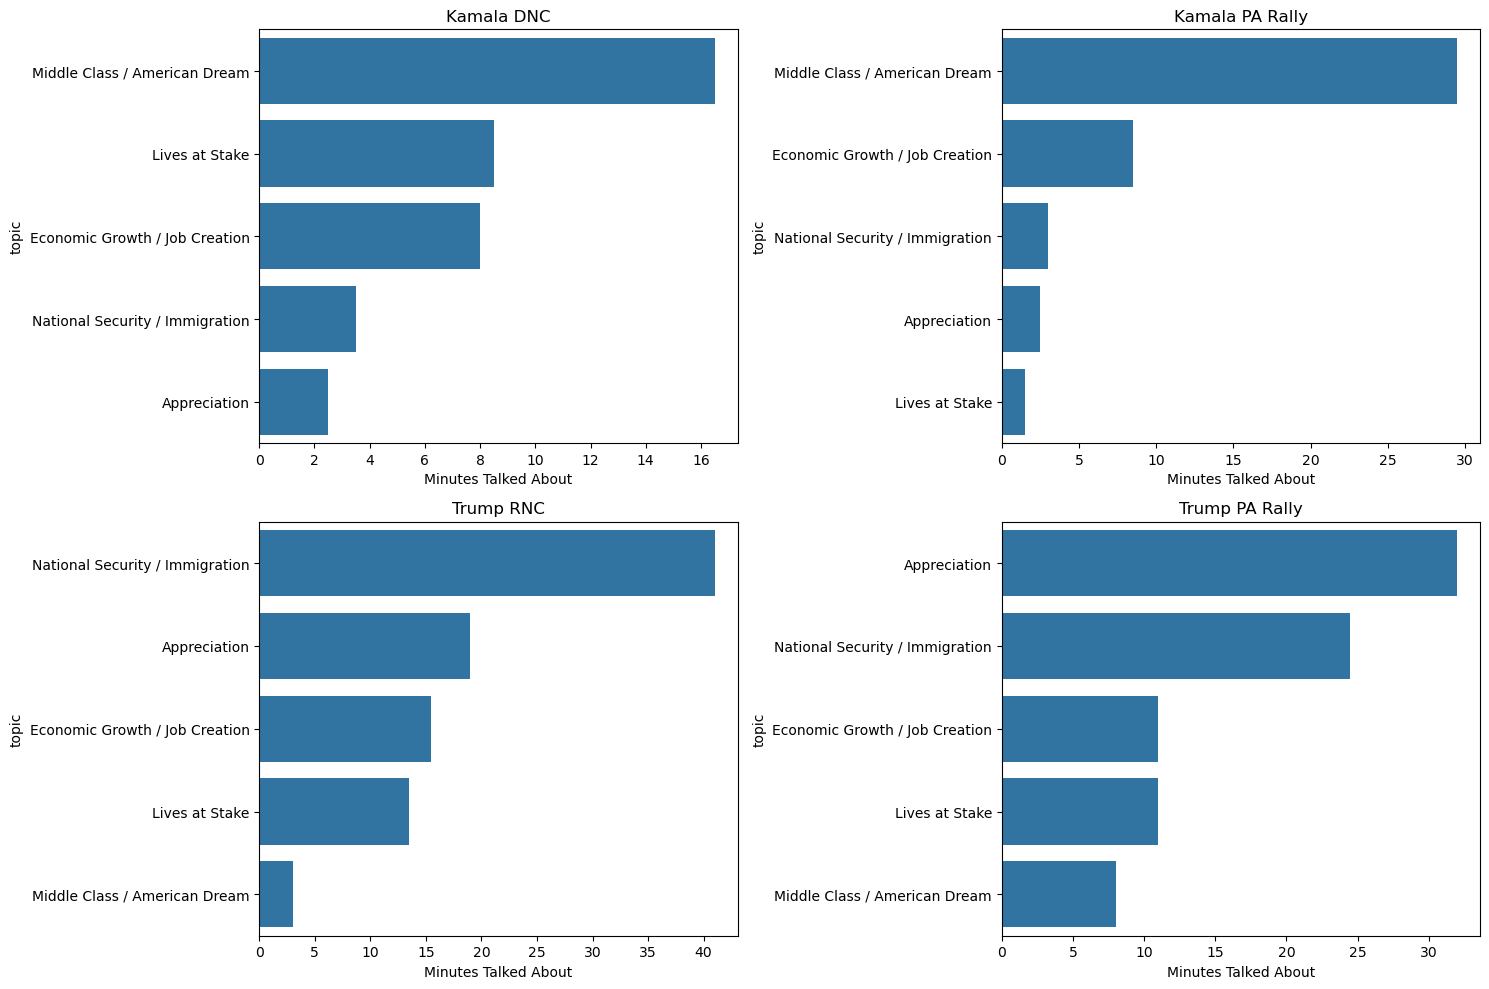

In [44]:
# plot distribution of topics per speech

plt.figure(figsize=(15, 10))

# speech 1
plt.subplot(2,2,1)
topic_minutes = clip_transcripts.loc[clip_transcripts['Speech ID'] == 1, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Kamala DNC')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

# speech 2
plt.subplot(2,2,3)
topic_minutes = clip_transcripts.loc[clip_transcripts['Speech ID'] == 2, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Trump RNC')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

# speech 3
plt.subplot(2,2,4)
topic_minutes = clip_transcripts.loc[clip_transcripts['Speech ID'] == 3, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Trump PA Rally')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

# speech 4
plt.subplot(2,2,2)
topic_minutes = clip_transcripts.loc[clip_transcripts['Speech ID'] == 4, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Kamala PA Rally')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

plt.tight_layout()



Text(0.5, 1.0, "Harris's Proportion of Time on Each Topic")

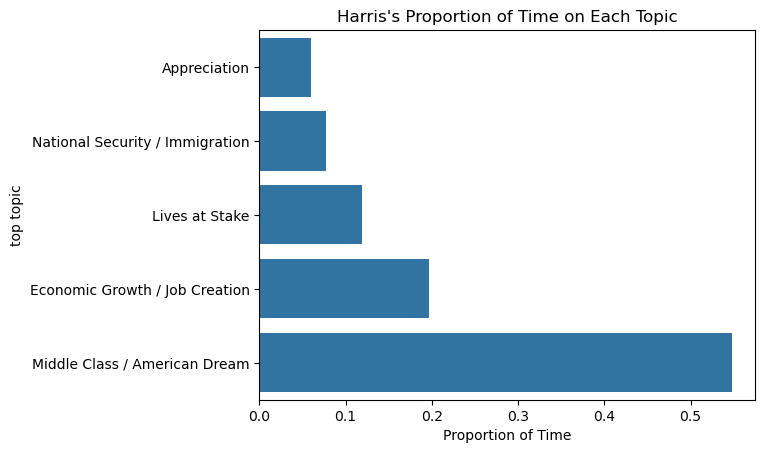

In [83]:
# proportion of overall time talked about each topic
mask = clip_transcripts['Speaker'] == 'Kamala Harris'
total_time = len(clip_transcripts[mask]) * 30 /60
prop_time = clip_transcripts[mask].groupby('top topic')['Chunk Number'].count() * 30 /60 / total_time
prop_time = prop_time.sort_values()
sns.barplot(y= prop_time.index, x = prop_time.values)
plt.xlabel('Proportion of Time')
plt.title('Harris\'s Proportion of Time on Each Topic')

Text(0.5, 1.0, "Trump's Proportion of Time on Each Topic")

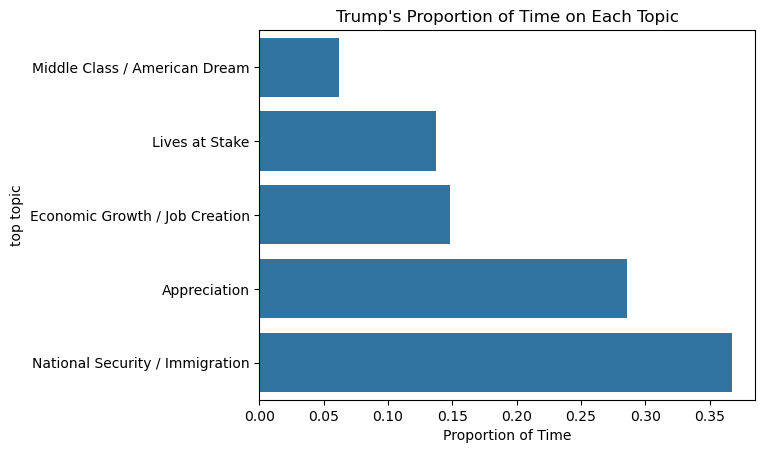

In [84]:
mask = clip_transcripts['Speaker'] == 'Donald Trump'
total_time = len(clip_transcripts[mask]) * 30 /60
prop_time = clip_transcripts[mask].groupby('top topic')['Chunk Number'].count() * 30 /60 / total_time
prop_time = prop_time.sort_values()
sns.barplot(y= prop_time.index, x = prop_time.values)
plt.xlabel('Proportion of Time')
plt.title('Trump\'s Proportion of Time on Each Topic')

## Examine Lie vs. Truth Topics

In [46]:
topics = ['Middle Class / American Dream','National Security / Immigration','Appreciation','Lives at Stake','Economic Growth / Job Creation']
lie_topics = pd.DataFrame()
for topic in topics:
    lie_topics[topic]=clip_transcripts.groupby(['lie'])[topic].mean()
lie_topics['top_topic'] = lie_topics.idxmax(axis=1)
lie_topics

,Middle Class / American Dream,National Security / Immigration,Appreciation,Lives at Stake,Economic Growth / Job Creation,top_topic
lie,,,,,,
False,0.193637,0.227095,0.243529,0.164996,0.170743,Appreciation
True,0.175114,0.312994,0.105918,0.147685,0.258289,National Security / Immigration


In [47]:
print('Minutes of lie:')
print((clip_transcripts['lie'] == True).sum() * 30 / 60)
print('Clips of lies')
print((clip_transcripts['lie'] == True).sum())

print('Minutes of truth')
print((clip_transcripts['lie'] == False).sum() * 30 / 60)
print('Clips of truth')
print((clip_transcripts['lie'] == False).sum())

Minutes of lie:
18.0
Clips of lies
36
Minutes of truth
244.5
Clips of truth
489


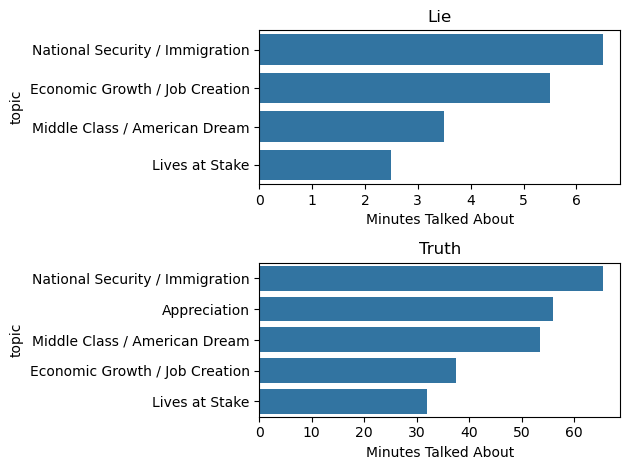

In [48]:
# plot distribution of topics per speech

# true
plt.subplot(2,1,1)
topic_minutes = clip_transcripts.loc[clip_transcripts['lie'] == True, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Lie')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

# speech 2
plt.subplot(2,1,2)
topic_minutes = clip_transcripts.loc[clip_transcripts['lie'] == False, 'top topic'].value_counts() * 30 / 60
sns.barplot(x = topic_minutes.values, y = topic_minutes.index)
plt.title('Truth')
plt.xlabel('Minutes Talked About')
plt.ylabel('topic')

plt.tight_layout()

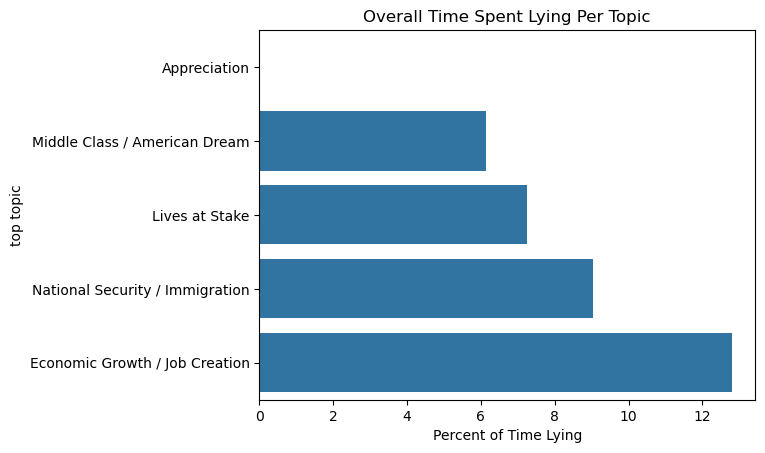

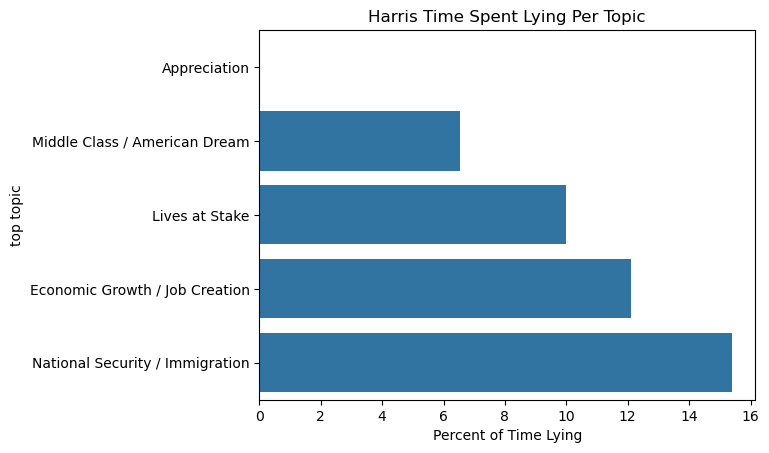

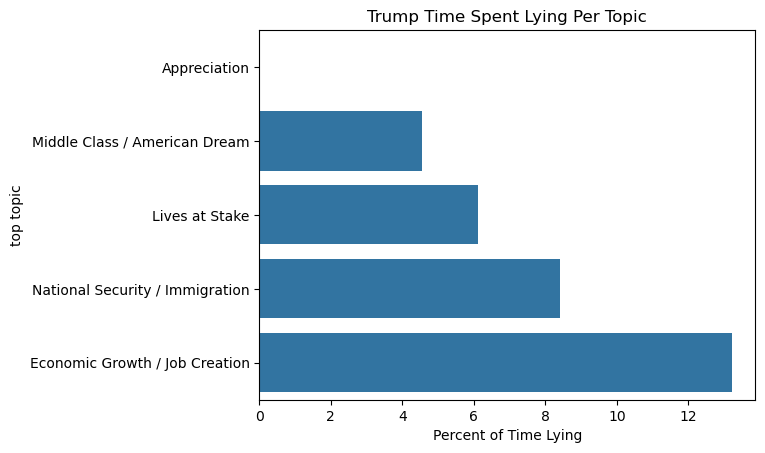

In [60]:
# proportion of time lying for each topic
topic_lie_prop = clip_transcripts.groupby('top topic')['lie'].mean().sort_values() * 100
sns.barplot(y=topic_lie_prop.index, x= topic_lie_prop.values)
plt.xlabel('Percent of Time Lying')
plt.title('Overall Time Spent Lying Per Topic')
plt.show()

# proportion of time lying for Kamala
mask = clip_transcripts['Speaker'] == 'Kamala Harris'
topic_lie_prop = clip_transcripts[mask].groupby('top topic')['lie'].mean().sort_values() * 100
sns.barplot(y=topic_lie_prop.index, x= topic_lie_prop.values)
plt.xlabel('Percent of Time Lying')
plt.title('Harris Time Spent Lying Per Topic')
plt.show()

# proportion of time lying for Trump
mask = clip_transcripts['Speaker'] == 'Donald Trump'
topic_lie_prop = clip_transcripts[mask].groupby('top topic')['lie'].mean().sort_values() * 100
sns.barplot(y=topic_lie_prop.index, x= topic_lie_prop.values)
plt.xlabel('Percent of Time Lying')
plt.title('Trump Time Spent Lying Per Topic')
plt.show()

In [74]:
# pull examples of lie and truth

# harris
print('Harris Lies:')
mask1 = clip_transcripts['Speaker'] == 'Kamala Harris'
mask2 = clip_transcripts['top topic'] == 'National Security / Immigration'
mask3 = clip_transcripts['lie'] == True
print('Economic Growth / Job Creation Lies:')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)
print('\n')
mask2 = clip_transcripts['top topic'] == 'National Security / Immigration'
print('National Security / Immigration')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)
print('\n')
mask2 = clip_transcripts['top topic'] == 'Lives at Stake'
print('Lives at Stake')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)
print('\n\n')

# trump
print('Trump Lies:')
mask1 = clip_transcripts['Speaker'] == 'Donald Trump'
mask2 = clip_transcripts['top topic'] == 'Economic Growth / Job Creation'
mask3 = clip_transcripts['lie'] == True
print('Economic Growth / Job Creation Lies:')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)
print('\n')
mask2 = clip_transcripts['top topic'] == 'National Security / Immigration'
print('National Security / Immigration')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)
print('\n')
mask2 = clip_transcripts['top topic'] == 'Lives at Stake'
print('Lives at Stake')
print(clip_transcripts.loc[mask1 & mask2 & mask3, 'Transcript'].values)

Harris Lies:
Economic Growth / Job Creation Lies:
["allies said Russia could float do whatever the hell they want  5 days before Russia attacks Ukraine I'm met with president zelensky to warn him about Russia's plan to invade I helped mobilize a Global Response over 50 countries to defend against Putin's aggression  president I will stand strong with you praying"
 "hundreds of jobs to Mexico under his watch  and it wasn't just there on trumps watch offshoring went up and manufacturing jobs went down across our country and our economy all told almost 200,000 manufacturing jobs were lost during his presidency starting before the pandemic hit  making Trump"]


National Security / Immigration
["allies said Russia could float do whatever the hell they want  5 days before Russia attacks Ukraine I'm met with president zelensky to warn him about Russia's plan to invade I helped mobilize a Global Response over 50 countries to defend against Putin's aggression  president I will stand strong with

In [ ]:
clip_transcripts.to_csv('data-files/transcript_data_w_lies_and_LDAtopics.csv', index=False)

# Prediction Using Topics

In [31]:
clips = pd.read_csv('data-files/transcript_data_w_lies_and_LDAtopics.csv')
clips

,YouTube URL,Chunk Number,Chunk Filename,Transcript,lie,Video ID,Speech ID,Speaker,Middle Class / American Dream,National Security / Immigration,Appreciation,Danger,Economic Growth / Job Creation,top topic
0,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,2,/Users/milanvaghani/Desktop/Unstructed Machine...,good evening everyone. Good evening good even...,False,-ofJu78Wpn0,1,Kamala Harris,0.009524,0.009524,0.390476,0.580952,0.009524,Danger
1,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,3,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you thank you thank you thank you thank...,False,-ofJu78Wpn0,1,Kamala Harris,0.129412,0.011765,0.835294,0.011765,0.011765,Appreciation
2,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,4,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you all thank you all okay we got to g...,False,-ofJu78Wpn0,1,Kamala Harris,0.004651,0.004651,0.981395,0.004651,0.004651,Appreciation
3,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,5,/Users/milanvaghani/Desktop/Unstructed Machine...,thank you everyone thank you everyone thank yo...,False,-ofJu78Wpn0,1,Kamala Harris,0.003636,0.221818,0.730909,0.003636,0.040000,Appreciation
4,https://youtu.be/-ofJu78Wpn0?si=H_BZ0KSYr_raPUac,6,/Users/milanvaghani/Desktop/Unstructed Machine...,I love you so very much do our President Joe ...,False,-ofJu78Wpn0,1,Kamala Harris,0.053659,0.443902,0.004878,0.492683,0.004878,Danger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,177,/Users/milanvaghani/Desktop/Unstructed Machine...,the Liberty Bell it's where the Army whether i...,False,Q5TIZnhXX7Q,3,Donald Trump,0.349333,0.002667,0.269333,0.189333,0.189333,Middle Class / American Dream
521,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,178,/Users/milanvaghani/Desktop/Unstructed Machine...,this is the place where Pennsylvania Patriots ...,False,Q5TIZnhXX7Q,3,Donald Trump,0.078481,0.331646,0.306329,0.281013,0.002532,National Security / Immigration
522,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,179,/Users/milanvaghani/Desktop/Unstructed Machine...,come our way no matter what obstacles we must ...,False,Q5TIZnhXX7Q,3,Donald Trump,0.195181,0.195181,0.002410,0.339759,0.267470,Danger
523,https://youtu.be/Q5TIZnhXX7Q?si=agpeKU04EQ-AtdJ_,180,/Users/milanvaghani/Desktop/Unstructed Machine...,we will make America healthy again we will ma...,False,Q5TIZnhXX7Q,3,Donald Trump,0.762162,0.005405,0.221622,0.005405,0.005405,Middle Class / American Dream


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'clips' is your DataFrame
X = clips[['Middle Class / American Dream', 'National Security / Immigration', 
           'Appreciation', 'Danger', 'Economic Growth / Job Creation']]
y = clips['lie']

# Stratified train-test split to maintain the proportion of the target 'lie'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression model
model = LogisticRegression()

# Optional: If you want to standardize the predictors (though they're probabilities between 0 and 1, so it might not be necessary)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.93      1.00      0.96       147
        True       0.00      0.00      0.00        11

    accuracy                           0.93       158
   macro avg       0.47      0.50      0.48       158
weighted avg       0.87      0.93      0.90       158



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**try using a different model and break it up by candidate?**

# Alternative Topic Modeling
I was having a hard time interpreting the topics from this model, so I went with the one above.

In [147]:
# imports
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NLP
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# LDA
import gensim
from gensim.corpora.dictionary import Dictionary

# for visualizig LDA
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /Users/kenne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kenne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/kenne/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kenne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kenne/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/kenne/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [148]:
# clean df so that speech_id is associated with each speech
speech_info = pd.read_csv('data-files/speech_info.csv')

# get video id and create dictionary to link
speech_info['Video ID'] = speech_info['YouTube Speech Link'].str.extract(r'v=([a-zA-Z0-9_-]+)')
vidID_to_speechID = dict(zip(speech_info['Video ID'], speech_info['Speech ID'],))

# get video id for transcripts
clips = pd.read_csv('data-files/transcripts_w_lies.csv')
clips['Video ID'] = clips['YouTube URL'].str.extract(r'youtu\.be/([a-zA-Z0-9_-]+)')
clips['Video ID'] = clips['Video ID'].fillna('XokApnr_Cak') # just manually inserted this one because it had a different pattern

# replace video id with speech id and save to new column
clips['Speech ID'] = clips['Video ID'].replace(vidID_to_speechID).astype('int')

# add speaker to clips df to use later
clips = pd.merge(clips, speech_info[['Speech ID', 'Speaker']], how = 'left', on = 'Speech ID')

/var/folders/18/y5p3lwcd31j2dw1d0_k3lqsh0000gp/T/ipykernel_2004/2335687643.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clips['Speech ID'] = clips['Video ID'].replace(vidID_to_speechID).astype('int')


## Examine Data
It might be wise to remove additional stop words so that the resulting topics are more clear.

In [149]:
# raw word frequencies after lemmatizing, removing, stopwords, and removing numeric characters

from collections import Counter

stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def preprocess(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatize words with correct POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    return lemmatized_words

# Apply preprocessing to the 'Transcript' column and flatten the list of lists
processed_docs = clips['Transcript'].dropna().apply(preprocess).tolist()
flattened_words = [word for doc in processed_docs for word in doc]

# Use Counter to count word frequencies
word_frequencies = Counter(flattened_words)

# Convert to DataFrame for display
freq_df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the word frequency DataFrame
display(freq_df.head(30))


,Word,Frequency
46,go,321
6,get,191
295,people,191
338,great,185
72,know,172
133,say,167
368,country,154
4,thank,148
67,one,133
104,make,121


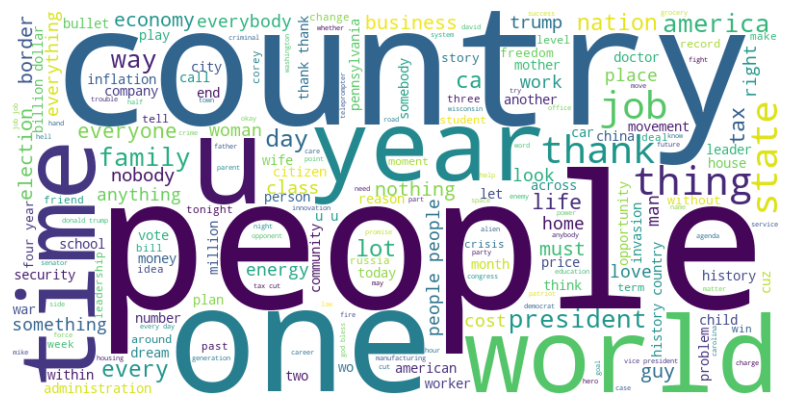

In [150]:
# word cloud of nouns after lemmatizing, removing, stopwords, and removing numeric characters

# increase stop words
stop_words = set(stopwords.words('english'))
# additional_stop_words = {'government', 'policy', 'official', 'public', 'state', 'office', 'vote', 'elect', 
#                          'represent', 'committee', 'agenda', 'country', 'nation', 'region', 'district', 
#                          'area', 'say', 'said', 'stated', 'claim', 'announce', 'america', 'american', 
#                          'know', 'want','people', 'president', 'going', 'goes', 'gone', 'went', 'us'
#                         }
# stop_words.update(additional_stop_words)
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def preprocess(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Filter to keep only nouns
    noun_tokens = [word for word, tag in pos_tags if get_wordnet_pos(tag) in {wordnet.NOUN}] #, wordnet.VERB
    
    # Lemmatize nouns
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in noun_tokens]
    
    return lemmatized_words

# Combine all text in the column into one large string
text = ' '.join(clips['Transcript'].dropna().apply(preprocess).apply(lambda x: ' '.join(x)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

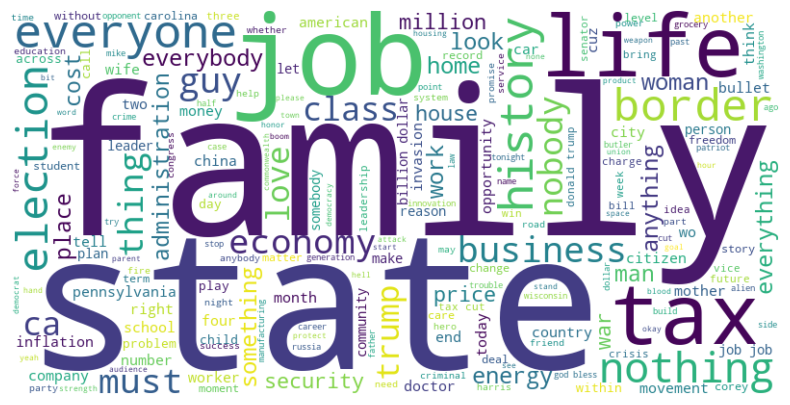

In [151]:
# word cloud of nouns after lemmatizing, removing stopwords (including additional stop words), and removing numeric characters

# increase stop words
stop_words = set(stopwords.words('english'))
additional_stop_words = {'government', 'policy', 'official', 'public', 'state', 'office', 'vote', 'elect', 
                         'represent', 'committee', 'agenda', 'country', 'nation', 'region', 'district', 
                         'area', 'say', 'said', 'stated', 'claim', 'announce', 'america', 'american', 
                         'know', 'want','people', 'president', 'going', 'goes', 'gone', 'went', 'us',
                         'one', 'world', 'thank', 'time', 'year', 'years', 'way', 'thing', 'day', 'lot',
                         'thing', 'every'
                        }
stop_words.update(additional_stop_words)
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def preprocess(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Filter to keep only nouns
    noun_tokens = [word for word, tag in pos_tags if get_wordnet_pos(tag) in {wordnet.NOUN}] #, wordnet.VERB
    
    # Lemmatize nouns
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in noun_tokens]
    
    return lemmatized_words

# Combine all text in the column into one large string
text = ' '.join(clips['Transcript'].dropna().apply(preprocess).apply(lambda x: ' '.join(x)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

## Topic Modeling

In [152]:
# including all parts of speech

# inputs --------------------------------------------------
num_topics = 7

# ---------------------------------------------------------
# increase stop words
stop_words = set(stopwords.words('english'))
additional_stop_words = {'government', 'policy', 'official', 'public', 'state', 'office', 'vote', 'elect', 
                         'represent', 'committee', 'agenda', 'country', 'nation', 'region', 'district', 
                         'area', 'say', 'said', 'stated', 'claim', 'announce'}
stop_words.update(additional_stop_words)

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def preprocess(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    [word for word in text.lower().split() if word not in stop_words]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatize words with correct POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    return lemmatized_words

# Apply preprocessing to the 'Transcript' column
processed_docs = clips['Transcript'].dropna().apply(preprocess)

# Create Gensim dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, 
                                   random_state = 1, minimum_probability = 0)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<2796 unique tokens: ['even', 'evening', 'everyone', 'good', 'thank']...> from 525 documents (total 14799 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<2796 unique tokens: ['even', 'evening', 'everyone', 'good', 'thank']...> from 525 documents (total 14799 corpus positions)", 'datetime': '2024-10-14T00:51:32.456306', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'created'}
INFO:gensim.models.ldamodel:using symmetric alpha at 0.14285714285714285
INFO:gensim.models.ldamodel:using symmetric eta at 0.14285714285714285
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 7 topics, 10 passes over the supplied corpus o

In [153]:
# only include nouns when creating topics


# inputs --------------------------------------------------
num_topics = 4

# ---------------------------------------------------------
# increase stop words
stop_words = set(stopwords.words('english'))
additional_stop_words = {'government', 'policy', 'official', 'public', 'state', 'office', 'vote', 'elect', 
                         'represent', 'committee', 'agenda', 'country', 'nation', 'region', 'district', 
                         'area', 'say', 'said', 'stated', 'claim', 'announce', 'america', 'american', 
                         'know', 'want','people', 'president', 'going', 'goes', 'gone', 'went', 'us',
                         'one', 'world', 'thank', 'time', 'year', 'years', 'way', 'thing', 'day', 'lot',
                         'thing', 'every'
                        }
stop_words.update(additional_stop_words)
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def preprocess(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Filter to keep only nouns
    noun_tokens = [word for word, tag in pos_tags if get_wordnet_pos(tag) in {wordnet.NOUN, wordnet.VERB}] 
    
    # Lemmatize nouns
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in noun_tokens]
    
    return lemmatized_words

# Apply preprocessing to the 'Transcript' column
processed_docs = clips['Transcript'].dropna().apply(preprocess)

# Create Gensim dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, 
                                   random_state = 1, minimum_probability = 0)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<2400 unique tokens: ['evening', 'everyone', 'business', 'got', 'okay']...> from 525 documents (total 9176 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<2400 unique tokens: ['evening', 'everyone', 'business', 'got', 'okay']...> from 525 documents (total 9176 corpus positions)", 'datetime': '2024-10-14T00:51:34.055801', 'gensim': '4.3.3', 'python': '3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'created'}
INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at 0.25
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 525 documents, updating mo

In [154]:
# get topic probabilities for each clip
s_index = list(clips['Transcript'].dropna().index) # index must match index of original df
for topic_number in range(num_topics):
    topic_probs = [lda_model.get_document_topics(bow)[topic_number][1] for bow in corpus]
    topic_series = pd.Series(topic_probs, index=s_index)
    clips[f"topic_{topic_number}_prob"] = topic_series
clips = clips.dropna(subset = 'Transcript')

### Examine Topics
Determine topic validity and topic titles. Topics should be visually separated on the MDS map, and ideally, words that are loading high on one aren't loading high on another.

In [155]:
# # topic visualization
# pyLDAvis.enable_notebook()
# pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [156]:
import pandas as pd

# Create an empty DataFrame to store word scores
words = [dictionary[id] for id in range(len(dictionary))]  # Get all words in the dictionary
topics_df = pd.DataFrame(index=words)

# For each topic, get the word scores
for topic_idx in range(num_topics):
    # Get the word scores for the current topic (list of tuples: (word_id, score))
    topic_terms = lda_model.get_topic_terms(topic_idx, topn=len(dictionary))  # Get all words for this topic

    # Create a dictionary mapping word IDs to scores
    word_scores = {dictionary[word_id]: score for word_id, score in topic_terms}

    # Add this topic's word scores to the DataFrame as a new column
    topics_df[f'Topic_{topic_idx}'] = topics_df.index.map(word_scores).fillna(0)

# Display the DataFrame
display(topics_df)
# topics_df.to_excel('data-files/topic_word_dist.xlsx')
# print('Topic word distribution written to "data-files/topic_word_dist.xlsx"')

,Topic_0,Topic_1,Topic_2,Topic_3
evening,0.003093,0.001455,0.000632,0.000891
everyone,0.006703,0.000895,0.003781,0.001047
business,0.001164,0.001204,0.001437,0.010469
got,0.007094,0.005291,0.004022,0.012558
okay,0.001180,0.000098,0.000093,0.002043
...,...,...,...,...
gettysburg,0.000091,0.000449,0.000071,0.000106
miner,0.000091,0.000447,0.000071,0.000108
philadelphia,0.000091,0.000447,0.000071,0.000108
danger,0.000454,0.000091,0.000070,0.000099


In [157]:
# Extract and display top words per topic
topics_dict = {}
for idx, topic in lda_model.print_topics(num_words = 15):
    # Clean and split the topic string into words
    topic_words = topic.replace('"', '').split(' + ')
    topic_words = [word.split('*')[1].strip() for word in topic_words]
    topics_dict[f'Topic_{idx}'] = topic_words

top_words_df = pd.DataFrame(topics_dict)
display(top_words_df)
# top_words_df.to_excel('data-files/topic_top_words.xlsx', index=False)
# print('Top 15 words per topic written to "topic_top_words.xlsx"')

INFO:gensim.models.ldamodel:topic #0 (0.250): 0.010*"think" + 0.009*"get" + 0.008*"win" + 0.008*"like" + 0.008*"make" + 0.007*"got" + 0.007*"everyone" + 0.007*"nothing" + 0.006*"energy" + 0.005*"fight" + 0.005*"tax" + 0.005*"love" + 0.005*"would" + 0.005*"price" + 0.005*"let"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.012*"make" + 0.011*"would" + 0.011*"get" + 0.010*"job" + 0.008*"like" + 0.007*"life" + 0.005*"could" + 0.005*"got" + 0.005*"war" + 0.005*"work" + 0.005*"border" + 0.004*"anything" + 0.004*"family" + 0.004*"done" + 0.004*"butler"
INFO:gensim.models.ldamodel:topic #2 (0.250): 0.013*"like" + 0.011*"let" + 0.009*"would" + 0.008*"love" + 0.008*"think" + 0.007*"state" + 0.007*"look" + 0.007*"go" + 0.007*"history" + 0.006*"woman" + 0.006*"done" + 0.005*"make" + 0.005*"take" + 0.005*"get" + 0.005*"family"
INFO:gensim.models.ldamodel:topic #3 (0.250): 0.013*"got" + 0.011*"tax" + 0.011*"job" + 0.010*"business" + 0.009*"economy" + 0.009*"get" + 0.008*"class" + 0.007*"take" + 0.

,Topic_0,Topic_1,Topic_2,Topic_3
0,think,make,like,got
1,get,would,let,tax
2,win,get,would,job
3,like,job,love,business
4,make,like,think,economy
5,got,life,state,get
6,everyone,could,look,class
7,nothing,got,go,take
8,energy,war,history,ca
9,fight,work,woman,family


In [158]:
# top clips for each topic
n_clips = 3
top_clips = {}
print('These are the clips that are most likely to be each topic')
for i in range(num_topics):
    top_clips_idx = clips.loc[:,f'topic_{i}_prob'].nlargest(n_clips).index.to_list()
    print(f'\nThese are the top clips for topic {i}:\n{clips.loc[top_clips_idx, 'Transcript'].values}')
    print(f'This is the likelihood for each of those clips:\n {clips.loc[:,f'topic_{i}_prob'].nlargest(n_clips)}')
    print(f'These speech IDs for the top clips: \n{clips.loc[top_clips_idx, 'Speech ID']}')

These are the clips that are most likely to be each topic

These are the top clips for topic 0:
["will also reduce your taxes still further next and by the way they want to raise your taxes for X think of it and all my life I grew up watching politicians I always love politics I guess I was on the other side I'd watched Paula and they were always talking about we will give you a tax cut we will give you a text that with my whole life I was watching I will give you a tax cut right wrist a congressman that's all they talked about this is the only Administration that said we're going to raise your taxes by four times what year"
 "Carolina is in big trouble judges in big trouble they need communication they have none because their poles have been knocked down and their wires are under water and even dangerous dangerously underwater but they have no communication Elon could you do something about starlink whatever the hell that is Elon whatever Starling that's all they want to hear is Starl

**Topic titles:**
- Topic 0: 
- Topic 1:
- Topic 2:
- Topic 3: Jobs and Economy

**Can I create an html with this visualization so we can insert it into our slideshow?**

### Examine Speech Topics

In [159]:
# get topic probabilities for each clip
s_index = list(clips['Transcript'].dropna().index) # index must match index of original df
for topic_number in range(num_topics):
    topic_probs = [lda_model.get_document_topics(bow)[topic_number][1] for bow in corpus]
    topic_series = pd.Series(topic_probs, index=s_index)
    clips[f"topic_{topic_number}_prob"] = topic_series
clips = clips.dropna(subset = 'Transcript')

In [160]:
speech_topics = pd.DataFrame()
for i in range(num_topics):
    speech_topics[f'topic_{i}']=clips.groupby(['Speech ID'])[f'topic_{i}_prob'].mean()
speech_topics['top topic'] = speech_topics.loc[:,'topic_0':f'topic_{num_topics-1}'].idxmax(axis=1)
display(speech_topics)

,topic_0,topic_1,topic_2,topic_3,top topic
Speech ID,,,,,
1,0.219998,0.292242,0.353293,0.134474,topic_2
2,0.265880,0.197182,0.332820,0.204103,topic_2
3,0.253109,0.261870,0.268572,0.216435,topic_2
4,0.145387,0.219075,0.309107,0.325937,topic_3


In [161]:
# plot distribution of topics
# replace with topic_i with new topic names

### Examine Lie vs. Truth Topics

In [162]:
lie_topics = pd.DataFrame()
for i in range(num_topics):
    lie_topics[f'topic_{i}']=clips.groupby(['lie'])[f'topic_{i}_prob'].mean()
lie_topics['top topic'] = lie_topics.loc[:,'topic_0':f'topic_{num_topics-1}'].idxmax(axis=1)
display(lie_topics)

,topic_0,topic_1,topic_2,topic_3,top topic
lie,,,,,
False,0.236746,0.235989,0.308021,0.219147,topic_2
True,0.199605,0.241605,0.346002,0.212734,topic_2


In [163]:
# plot distribution of topics
# replace with topic_i with new topic names
